In [1]:
import os
import sys

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display
from numpy import (
    array,
    float64,
)

sys.path.insert(1, '../lab1-histogram')
from utils import rgb2gray
from image_normalization import normalize_image
from utils2 import (
    get_factors,
    get_lists_intersection,
)
from integral_image import compute_integral_image

In [2]:
input_image = array(rgb2gray(mpimg.imread("original_image.jpeg")), dtype=float64)

In [3]:
integral_image = compute_integral_image(input_image)
integral_image_square = compute_integral_image(input_image, 2)

In [4]:
grid_sizes = sorted(get_lists_intersection(get_factors(input_image.shape[0]), get_factors(input_image.shape[1])))
grid_sizes

[1, 2, 4, 5, 10, 20, 25, 50, 100, 125, 250, 500]

/home/helga/.local/share/virtualenvs/image_processing_and_recognition-LSsdEcBh/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


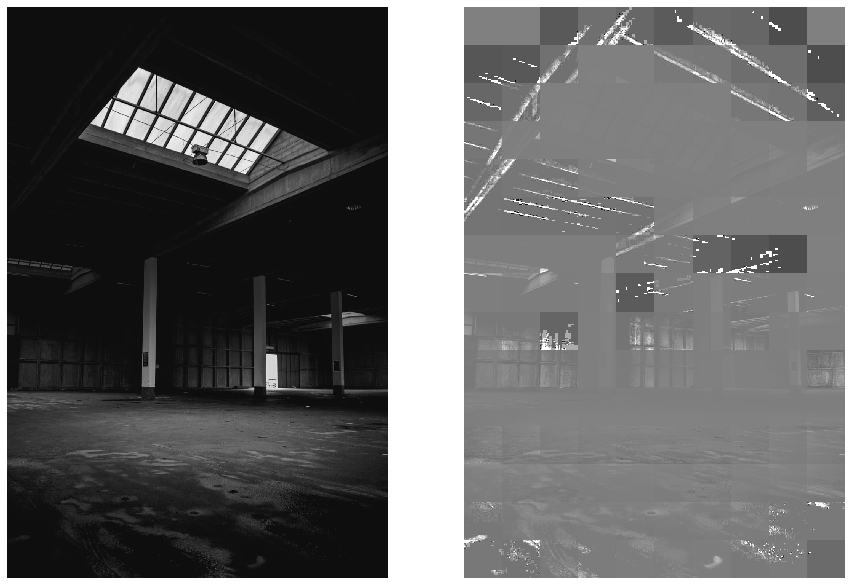

In [5]:
GRID_SIZE = 100
NEW_MEAN = 128
NEW_DISPERSION = 50

fig = plt.figure(figsize=(15, 15))
ax_orig = fig.add_subplot(121)
ax_norm = fig.add_subplot(122)

for ax in [ax_orig, ax_norm]:
    ax.set_axis_off()

ax_orig.imshow(input_image, cmap="gray")
normalized_image = normalize_image(
    input_image, integral_image, integral_image_square, GRID_SIZE, NEW_MEAN, NEW_DISPERSION)
ax_norm.imshow(normalized_image, cmap="gray")
fig.show()